<a href="https://colab.research.google.com/github/FelipeMYoshi/K_means_sintomas/blob/main/Projeto_Integrador_3A_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#   Algoritmo   : Detecção de Doenças (K-means)
#   Disciplina  : Projeto Integrador III-A (11304920005_20212_01)
#   Professor   : GUSTAVO SIQUEIRA VINHAL
#   Descrição   : Detecção de doenças com base em sintomas
#   Data atual  : Versão-29.09.2021
#   Estudantes  : Deibe Paiva Lima
#                 Felipe Martins Yoshimoto 
#                 Guilherme Colherinhas de Oliveira


#   As doenças escolhidas para compor o banco de informações para avaliação do programa foram:
#       Malária  (Alvo = 0)
#       Covid-19 (Alvo = 1)
#       Gripe    (Alvo = 2)

#   Estas três doenças foram escolhidas por possuir alguns sintomas similares e, 
#   em nossa avaliação, o recurso computacional poderia ser útil para ajudar a distinguir
#   possíveis casos de Covid-19 em uma primeira triagem. 

#   A etapa de aprendizado de máquina foi realizada utilizando um conjunto de 300 instâncias
#   contendo 3 sintomas de cada doença. O conjunto de dados foi então dividido em 70% e 30%, 
#   correspondendo a dados de treinamento e teste, respectivamente.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pa
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import drive
import seaborn as sb
import matplotlib.pyplot as pp
import numpy as np

def ler_sintomas():  # Esta função realiza e valida a leitura (entrada) dedef ler_sintomas():
# Esta função realiza e valida a leitura (entrada) de dados (sintomas) pelo usuário dados (sintomas) pelo usuário
    while True:
      print('')
      print('ESCOLHA 3 SINTOMAS (MENOS PARA O MAIS GRAVE):')
      print('')
      print('1	Tosse com catarro                              2	Nausea e vômito')
      print('3	Frebre e dores o corpo                         4	Cansaço')
      print('5	Diarreia                                       6	Perda do Paladar e Olfato')
      print('7	Falta de ar e dores no peito')
      print('')
      s = input('Digite uma das opções acima: ')
      if s in ('1', '2', '3', '4', '5', '6', '7'):
        print('OPÇÃO REGISTRADA')
        break
      else:
        print('OPÇÃO INVÁLIDA')
        print('')
    return s


def apresentacao_sintomas(sintomas):  # Esta função apresenta os sintomas informados pelo usuário
    for i in range(0,3):
        if sintomas[i] == '1':
            print('   Tosse com catarro')
            paciente[0][i] = 1
        elif sintomas[i] == '2':
            print('   Nausea e vômito')
            paciente[0][i] = 2
        elif sintomas[i] == '3':
            print('   Frebre e dores o corpo')
            paciente[0][i] = 3
        elif sintomas[i] == '4':
            print('   Cansaço')
            paciente[0][i] = 4
        elif sintomas[i] == '5':
            print('   Diarreia')
            paciente[0][i] = 5
        elif sintomas[i] == '6':
            print('   Perda do Paladar e Olfato')
            paciente[0][i] = 6
        elif sintomas[i] == '7':
            print('   Falta de ar e dores no peito')
            paciente[0][i] = 7
    return


def apresentacao_resul(resultado):  # Esta função calcula e apresenta o diagnóstico com base nos pesos
    if resultado == 0:  # atribuidos aos sintomas
        print('        Possível diagnóstico: Malária')
    if resultado == 1:
        print('        Possível diagnóstico: Covid-19')
    if resultado == 2:
        print('        Possível diagnóstico: Gripe')
    return

In [ ]:
#  Plotando a matriz de confusão e acurácia
#  Foi utilizado 70% de treinamento e 30% de teste

drive.mount('/content/drive')

df = pa.read_csv('/content/drive/My Drive/ProjetoIntegrador3A/dataset2.csv',sep=';',encoding='utf-8', names=['Sintoma 1', 'Sintoma 2', 'Sintoma 3','Alvo'])
x = pa.DataFrame(data=df, columns=['Sintoma 1', 'Sintoma 2', 'Sintoma 3'])
y = pa.DataFrame(data=df, columns=['Alvo'])

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=4)

alg = KMeans(n_clusters=3, random_state=15)
alg.fit(x_treino)
prevs = alg.predict(x_teste)
y_prevs = prevs

print('')
print('MATRIZ DE CONFUSÃO E ACURÁCIA: ')
print('')
cm = confusion_matrix(y_teste, y_prevs)
cmtx = pa.DataFrame(cm, index=(['Real: Malária', 'Real: Covid-19','Real: Gripe']),columns=(['Prev: Malária','Prev: Covid-19','Prev: Gripe']))
print(cmtx)
acc = accuracy_score(y_teste,y_prevs)
print('Acurácia no Teste: {0:0.2f}%'.format(acc*100))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

MATRIZ DE CONFUSÃO E ACURÁCIA: 

                Prev: Malária  Prev: Covid-19  Prev: Gripe
Real: Malária              19               0            7
Real: Covid-19              5              27            0
Real: Gripe                 0               0           32
Acurácia no Teste: 86.67%


In [ ]:
#  Matriz de correlação 
#  Com base no nosso bando de dados, observamos a matriz de correlação
#  para avaliar o quanto os sintomas listados como 1, 2 e 3 estão correlacionados.
#  nossos resultados mosram uma correlação entre 85 a 90% para os sintomas listados.

correlacao = x.corr()
print(correlacao)


           Sintoma 1  Sintoma 2  Sintoma 3
Sintoma 1   1.000000   0.859209   0.864727
Sintoma 2   0.859209   1.000000   0.903462
Sintoma 3   0.864727   0.903462   1.000000


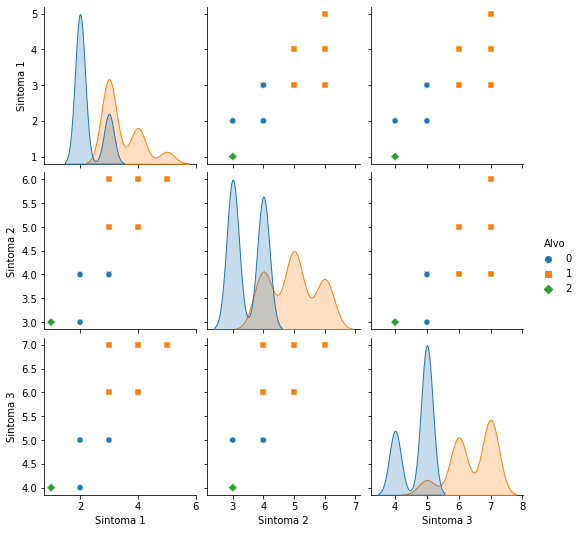

In [ ]:
# plotando os gráficos de dispersão entre os resultados da tabela

sb.pairplot(data=df, hue='Alvo', markers=["o", "s", "D"], palette='tab10')


In [ ]:
while True:
    print('')
    nome = input('Informe o nome do Paciente:  ')
    while True:
        idade = input('Informe a idade do Paciente:  ')
        if not idade.isdigit():
            print("DIGITE APENAS NÚMERO!")
        else:
            break
    while True:
        sexo = input('Informe o sexo (M/F) do Paciente:  ')
        if sexo in 'M m F f':
            break
        else:
            print('DIGITE APENAS M/F!')
    sintomas = []
    for i in range(0,3):
        aux = ler_sintomas()
        sintomas.append(aux)

    print('')
    print('PACIENTE: ', nome)
    print('IDADE: ', idade)
    print('SEXO: ', sexo)
    print('')
    print('SINTOMAS INFORMADOS :')
    print('')
    paciente = [[sintomas[0], sintomas[1], sintomas[2]]]
    apresentacao_sintomas(sintomas)
    resultado_exame = alg.predict(paciente)
    print('')
    print('DIAGNÓSTICO: ')
    print('')
    apresentacao_resul(resultado_exame)
    print('')
    while True:
        print('')
        aux2 = input('Deseja inserir dados de outro paciente (s/n)?: ')
        if aux2 in ('s', 'S', 'n', 'N'):
            break
        else:
            print('Opção Inválida!')
    if aux2 in ('n', 'N'):
        print('OPERAÇÃO FINALIZADA!')
        break



Informe o nome do Paciente:  guilherme
Informe a idade do Paciente:  44
Informe o sexo (M/F) do Paciente:  m

ESCOLHA 3 SINTOMAS (MENOS PARA O MAIS GRAVE):

1	Tosse com catarro                              2	Nausea e vômito
3	Frebre e dores o corpo                         4	Cansaço
5	Diarreia                                       6	Perda do Paladar e Olfato
7	Falta de ar e dores no peito

Digite uma das opções acima: 1
OPÇÃO REGISTRADA

ESCOLHA 3 SINTOMAS (MENOS PARA O MAIS GRAVE):

1	Tosse com catarro                              2	Nausea e vômito
3	Frebre e dores o corpo                         4	Cansaço
5	Diarreia                                       6	Perda do Paladar e Olfato
7	Falta de ar e dores no peito

Digite uma das opções acima: 9
OPÇÃO INVÁLIDA


ESCOLHA 3 SINTOMAS (MENOS PARA O MAIS GRAVE):

1	Tosse com catarro                              2	Nausea e vômito
3	Frebre e dores o corpo                         4	Cansaço
5	Diarreia                                       6	Perd